# Parameterization with the Open Force Field Toolkit
This notebook shows how to use the API of `peleffy` to combine the parameters from OPLS2005 and force fields from the Open Force Field initiative. There are several possible combinations that are displayed below.

## Example 1: Open Force Field parameters with OPLS2005 charges
This example shows how to parameterize a molecule by combining the parameters from the Open Force Field initiative with OPLS2005 partial charges.

### `peleffy` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `peleffy` needs the following environment variable to be set.

In [1]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `peleffy`'s molecule representation with a PDB file of anthracene

In [2]:
from peleffy.topology import Molecule

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'c1ccc2cc3ccccc3cc2c1'
   - Representing molecule with the Open Force Field Toolkit


 - Generating rotamer library
   - Core set to the center of the molecule


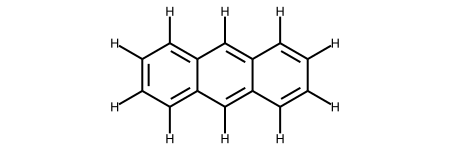

In [3]:
molecule = Molecule(smiles='c1ccc2cc3ccccc3cc2c1')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`, and generate the Impact template
Please, note that to use OPLS2005 partial charges from OPLS2005 we need to select the `OPLS2005` option in the `charges_method` parameter when calling the `OpenForceField.parameterize()` function.
Then, the Impact template, named __antz__, can be generated.

In [4]:
from peleffy.forcefield import OpenForceField
from peleffy.topology import Topology
from peleffy.template import Impact

In [5]:
openff = OpenForceField('openff_unconstrained-1.2.0.offxml')
parameters = openff.parameterize(molecule, charge_method='OPLS2005')

In [6]:
topology = Topology(molecule, parameters)

In [7]:
impact = Impact(topology)
impact.to_file('antz')

## Example 2: OPLS2005 parameters with OpenFF torsions
This example shows how to parameterize a molecule by combining the parameters from the `OPLS2005` parameters with `OpenFF` torsions. This combination of parameters allows PELE to use its SGB implicit solvent model (which requires OPLS2005 atom types to be assigned).

### `peleffy` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `peleffy` needs the following environment variable to be set.

In [8]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `peleffy`'s molecule representation with a PDB file of aldicarb

In [9]:
from peleffy.topology import Molecule

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'CC(C)(/C=N\OC(=O)NC)SC'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


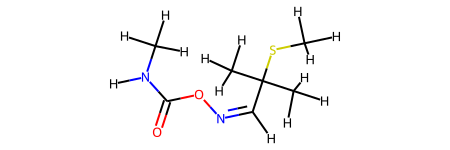

In [10]:
molecule = Molecule(smiles='CC(C)(/C=N\OC(=O)NC)SC')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`
To work with OPLS2005 non-bonding parameters, we need work with a special force field called `OpenFFOPLS2005ForceField`.

In [11]:
from peleffy.forcefield import OpenFFOPLS2005ForceField

hybridff = OpenFFOPLS2005ForceField('openff_unconstrained-1.2.0.offxml')

### Set up the hybrid force field
This force field allows us to combine `OpenFF` and `OPLS2005` parameters through its methods. There are several parameter types that can be combined:
- Non bonding parameters: with `set_nonbonding_parameters()`
- Bond parameters: with `set_bond_parameters()`
- Angle parameters: with `set_angle_parameters()`
- Torsion parameters: with `set_torsion_parameters()`

Please, note that partial charges are assigned by using the `charge_method` parameter from the `OpenFFOPLS2005ForceField.parameterize()` method.

Below, we are setting up the hybrid force field to parameterize the ligand with the nonbonding, bond and angles terms from the `OPLS2005` force field and assign the torsion parameters with the `OpenFF` force field.

In [12]:
hybridff.set_nonbonding_parameters('OPLS2005')
hybridff.set_bond_parameters('OPLS2005')
hybridff.set_angle_parameters('OPLS2005')
hybridff.set_torsion_parameters('OpenFF')

### Generate the Impact template
Finally, the Impact template, named __aldz__, can be generated.

In [13]:
from peleffy.topology import Topology
from peleffy.template import Impact

In [14]:
parameters = hybridff.parameterize(molecule, charge_method='OPLS2005')
topology = Topology(molecule, parameters)

In [15]:
impact = Impact(topology)
impact.to_file('aldz')

## Example 3: OpenFF terms with OPLS2005 non-bonding parameters
This example shows how to parameterize a molecule by combining the parameters from the `OpenFF` with non bonding terms from the `OPLS2005`force field. This combination of parameters also allows PELE to use its SGB implicit solvent model (which requires OPLS2005 atom types to be assigned).

### `peleffy` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `peleffy` needs the following environment variable to be set.

In [16]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `peleffy`'s molecule representation with a PDB file of diazinon

In [17]:
from peleffy.topology import Molecule

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


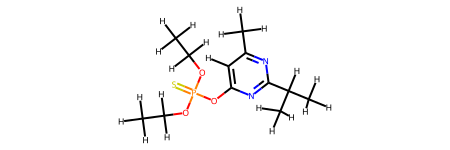

In [18]:
molecule = Molecule(smiles='CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`
To work with OPLS2005 non-bonding parameters, we need work with a special force field called `OpenFFOPLS2005ForceField`.

In [19]:
from peleffy.forcefield import OpenFFOPLS2005ForceField

hybridff = OpenFFOPLS2005ForceField('openff_unconstrained-1.2.0.offxml')

### Set up the hybrid force field
This force field allows us to combine `OpenFF` and `OPLS2005` parameters through its methods. There are several parameter types that can be combined:
- Non bonding parameters: with `set_nonbonding_parameters()`
- Bond parameters: with `set_bond_parameters()`
- Angle parameters: with `set_angle_parameters()`
- Torsion parameters: with `set_torsion_parameters()`

Please, note that partial charges are assigned by using the `charge_method` parameter from the `OpenFFOPLS2005ForceField.parameterize()` method.

Below, we are setting up the hybrid force field to parameterize the ligand with the nonbonding, bond and angles terms from the `OPLS2005` force field and assign the torsion parameters with the `OpenFF` force field.

In [20]:
hybridff.set_nonbonding_parameters('OPLS2005')
hybridff.set_bond_parameters('OpenFF')
hybridff.set_angle_parameters('OpenFF')
hybridff.set_torsion_parameters('OpenFF')

### Generate the Impact template
Finally, the Impact template, named __diaz__, can be generated.

In [21]:
from peleffy.topology import Topology
from peleffy.template import Impact

In [22]:
parameters = hybridff.parameterize(molecule, charge_method='OPLS2005')
topology = Topology(molecule, parameters)

In [23]:
impact = Impact(topology)
impact.to_file('diaz')